# **Importing Necessary Libraries**

In [1]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=d781893b56e12ea1c9ffaca0696b9214537f89dd6793ecbe416bb02dd7c918f8
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product


# **Loading and Exploring the Data**

In [3]:
# Load dataset
data = pd.read_csv('mcdonalds.csv')


In [4]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
# Display basic information and preview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


**NOTE:** There are three columns in Dataset having different features as compared to other columns. Columns "Like" and "Age" are having numerical features and "VisitFrequency" is having multiclass features.

In [6]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
#checking the shape of the data
print(data.shape)

(1453, 15)


In [8]:
# getting the value counts of 'Age'
data['Age'].value_counts()

,count
Age,
55,53
60,38
37,37
59,36
57,36
52,36
58,35
36,35
49,34


In [9]:
# getting the value counts of 'VisitFrequency'
data['VisitFrequency'].value_counts()


,count
VisitFrequency,
Once a month,439
Every three months,342
Once a year,252
Once a week,235
Never,131
More than once a week,54


In [10]:
# getting the value counts of 'Gender'
data['Gender'].value_counts()

,count
Gender,
Female,788
Male,665


In [11]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


# **Data Cleaning**

In [12]:
# Remove duplicates
data = data.drop_duplicates()

In [13]:
# Outlier Detection (Example using Z-score for numerical data)
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]  # Keep data within 3 standard deviations

# **Data Visulization and Correlation Analysis**

Categorical columns: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']
Continuous columns: ['Age']

Correlation matrix:
      Age
Age  1.0


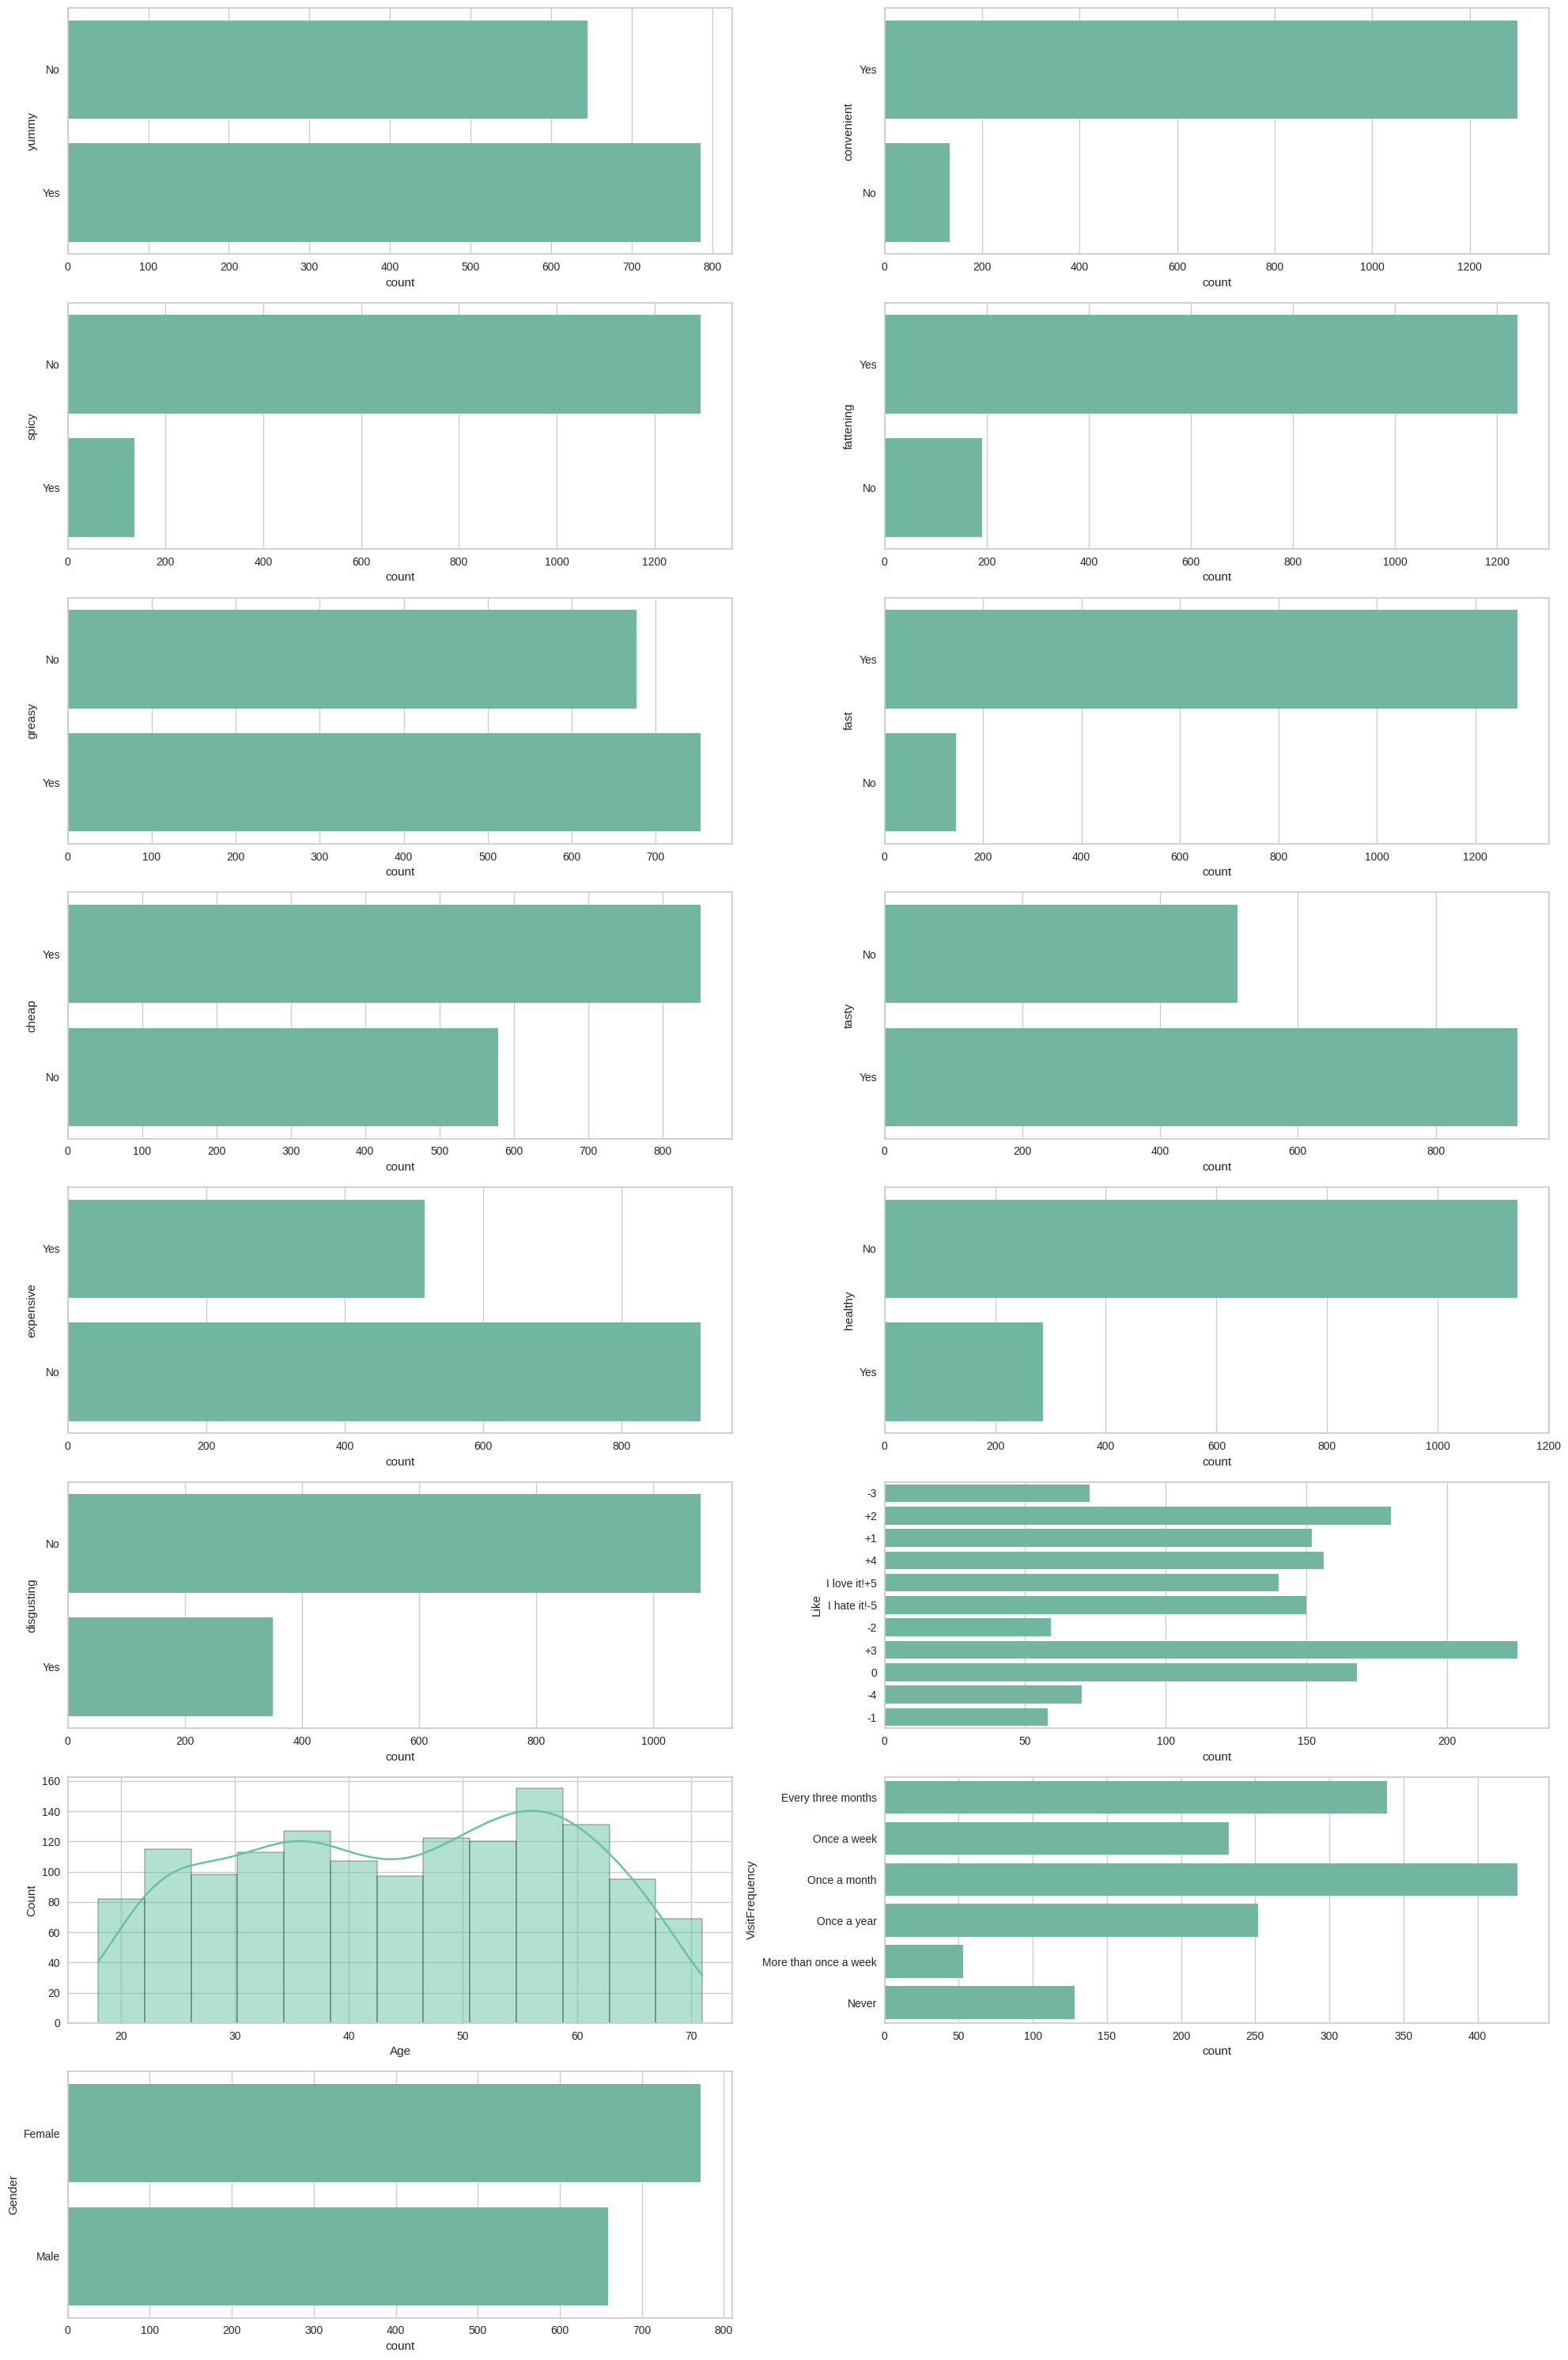

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining a function to perform EDA
def EDA(data, figuresize):
    cat = []  # List to store categorical column names
    con = []  # List to store continuous column names

    from warnings import filterwarnings
    filterwarnings("ignore")

    sns.set_palette("Set2")

    u = int((data.shape[1] + 1) / 2)  # Defining number of rows for subplots
    plt.figure(figsize=figuresize)   # Setting the figure size for the plot
    x = 1  # Counter for subplot position

    for i in data.columns:
        if data[i].dtypes == "object":       # Checking if column is categorical
            cat.append(i)
            plt.subplot(u, 2, x)           # Creating a subplot
            x += 1
            sns.countplot(data[i])           # Ploting a countplot for categorical data
        elif data[i].dtypes in ["int64", "float64"]:  # Check if column is numeric
            con.append(i)
            plt.subplot(u, 2, x)           # Creating a subplot
            x += 1
            sns.histplot(data[i], kde=True)  # Ploting a histogram with KDE for continuous data

    plt.tight_layout()  # Adjust layout to prevent overlapping
    print("Categorical columns:", cat)
    print("Continuous columns:", con)
    print("\nCorrelation matrix:\n", data[con].corr())  # Displaying correlation for continuous data

# Applying the function on the dataset
EDA(data, (20, 30))


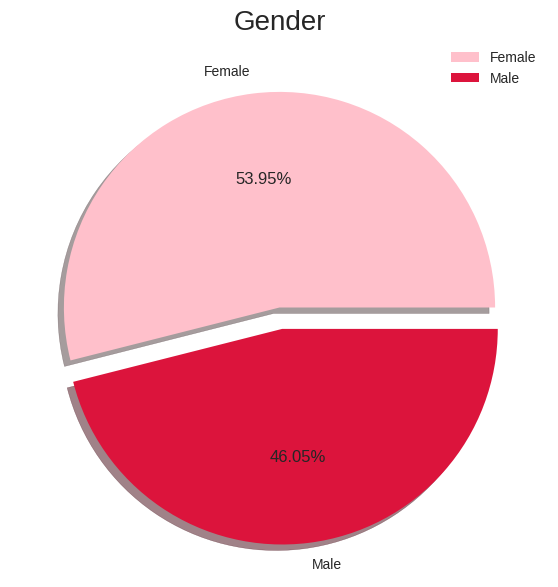

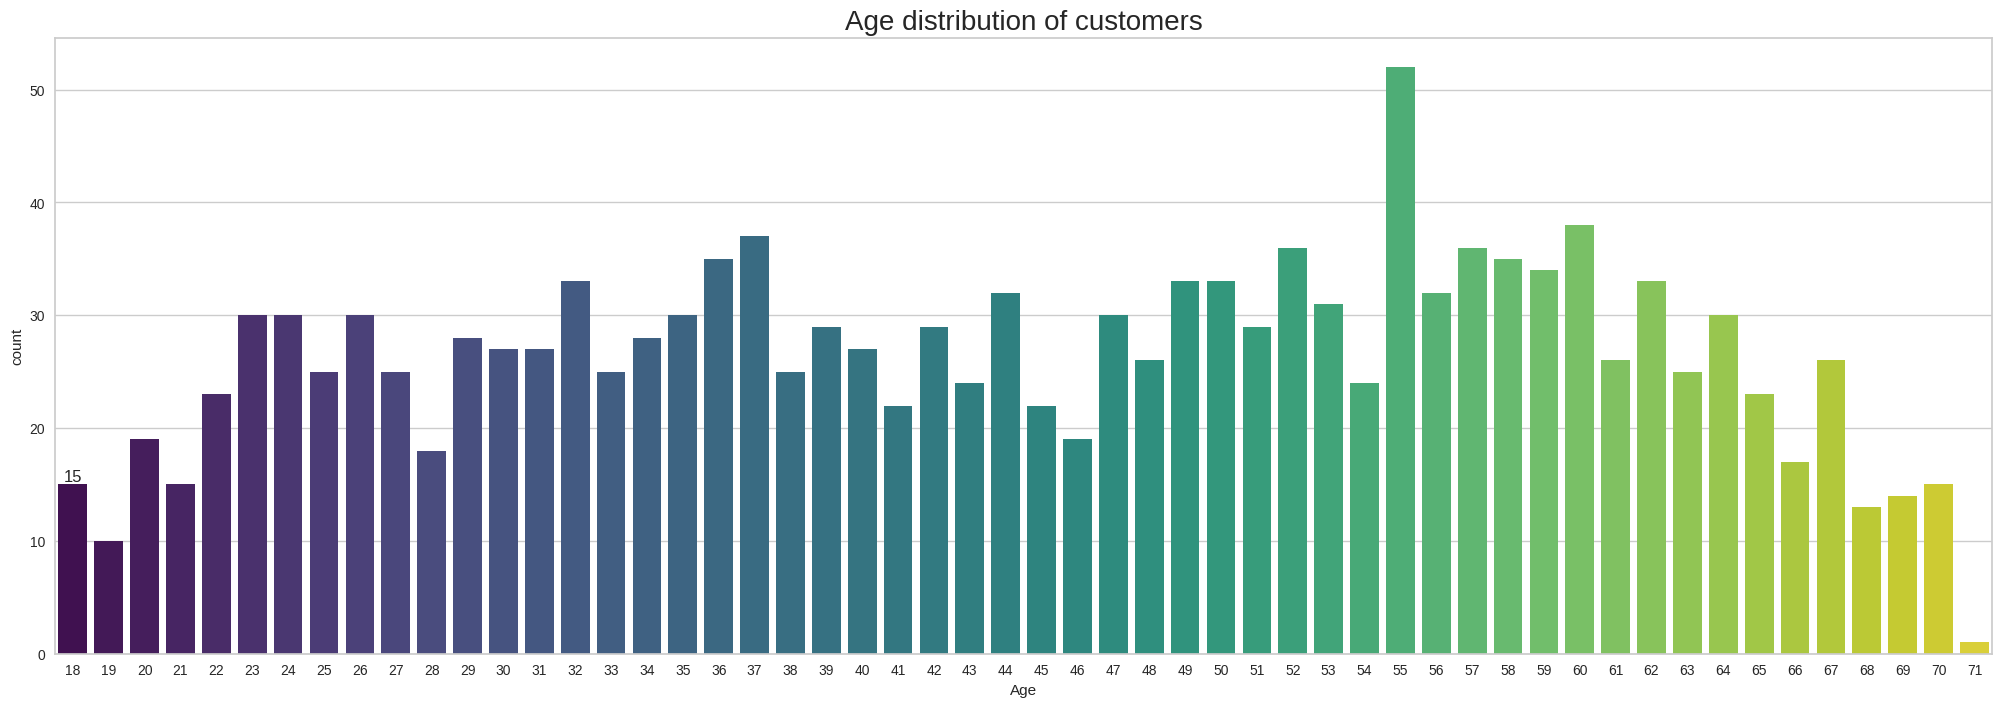

In [15]:
# Demographic segmentation using 'Age' & 'Gender'

# Gender: we infer that there are more female customers than male
labels = ['Female', 'Male']
size = data['Gender'].value_counts()  # Get the counts of each gender
colors = ['pink', 'crimson']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

# Age distribution of customers
plt.rcParams['figure.figsize'] = (25, 8)
age_plot = sns.countplot(x=data['Age'], palette='viridis')  # Renamed variable to `age_plot`
age_plot.bar_label(age_plot.containers[0])
plt.title('Age distribution of customers', fontsize=20)
plt.show()


# **Preprocessing (Feature Encoding and Scaling)**

In [16]:
# columns other than Like, Age, VisitFrequency, Gender are having binary features in the form of Yes/No only.
# so we will perform 'label encoding' for further model building
data_new = data.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

In [17]:
data_new.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [18]:
# LabelEncoder will map 'Yes' to 1 and 'No' to 0
df_encoded = data_new.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


# **Dimensionality Reduction with PCA**

In [19]:
# applying scaling and PCA
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.693292,0.457790,-0.286232,-0.873823,1.505703,-0.455598,0.042382,0.702925,-0.353196,-0.317433,1.702108
1,0.470508,-0.363136,1.602268,-0.032383,-0.460810,0.434931,-0.108627,-0.450103,-0.226779,-0.189278,1.467193
2,-0.181643,-1.696828,0.405835,3.323900,1.285681,-0.145801,0.624131,0.673397,-1.366467,1.261705,-0.133832
3,0.130097,1.149804,1.021156,0.459375,-1.149766,0.848571,-0.035911,-0.425610,1.565772,-0.097576,-0.233354
4,0.053154,1.392333,-0.762014,0.476912,0.257014,0.866214,1.811420,0.676842,-1.619899,-0.092497,-0.033580


In [20]:
# variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.25541988, 0.14758261, 0.12505419, 0.09829426, 0.08354589,
       0.07115268, 0.0650019 , 0.05415297, 0.0478685 , 0.02830557,
       0.02362156])

In [21]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_components_  # or you can use df_encoded.shape[1] if you want the original number of features
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)  # Transpose to align features with PCs
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,0.404960,-0.287285,0.260870,0.023466,-0.345118,0.121699,-0.162425,-0.018874,0.194177,-0.691746,-0.089428
convenient,0.308171,0.047352,0.319721,-0.019837,0.437172,-0.187075,0.658464,-0.160599,0.336700,-0.028941,0.022027
spicy,0.025301,-0.069101,-0.009648,0.844309,0.191500,-0.440839,-0.208775,0.034704,-0.025504,-0.058195,-0.042354
fattening,-0.177350,0.207910,0.607235,-0.031682,-0.090732,-0.104294,0.031825,0.721158,-0.097219,0.019861,-0.074462
greasy,-0.267672,0.133103,0.397911,0.325045,-0.339919,0.271844,0.297280,-0.492856,-0.353091,0.015175,-0.031903
fast,0.213338,0.283126,0.213410,0.085312,0.567880,0.570552,-0.396680,-0.052292,-0.100240,-0.018751,-0.054750
cheap,0.291992,0.572497,-0.122903,0.119250,-0.260293,-0.017599,0.010894,0.061065,0.061677,-0.058699,0.691739
tasty,0.424724,-0.244535,0.271903,0.068665,-0.283812,0.048637,-0.201324,-0.061334,0.212530,0.713282,0.004178
expensive,-0.293961,-0.565153,0.183958,0.032525,0.210042,0.169913,-0.015946,0.062704,0.010894,-0.026398,0.693758


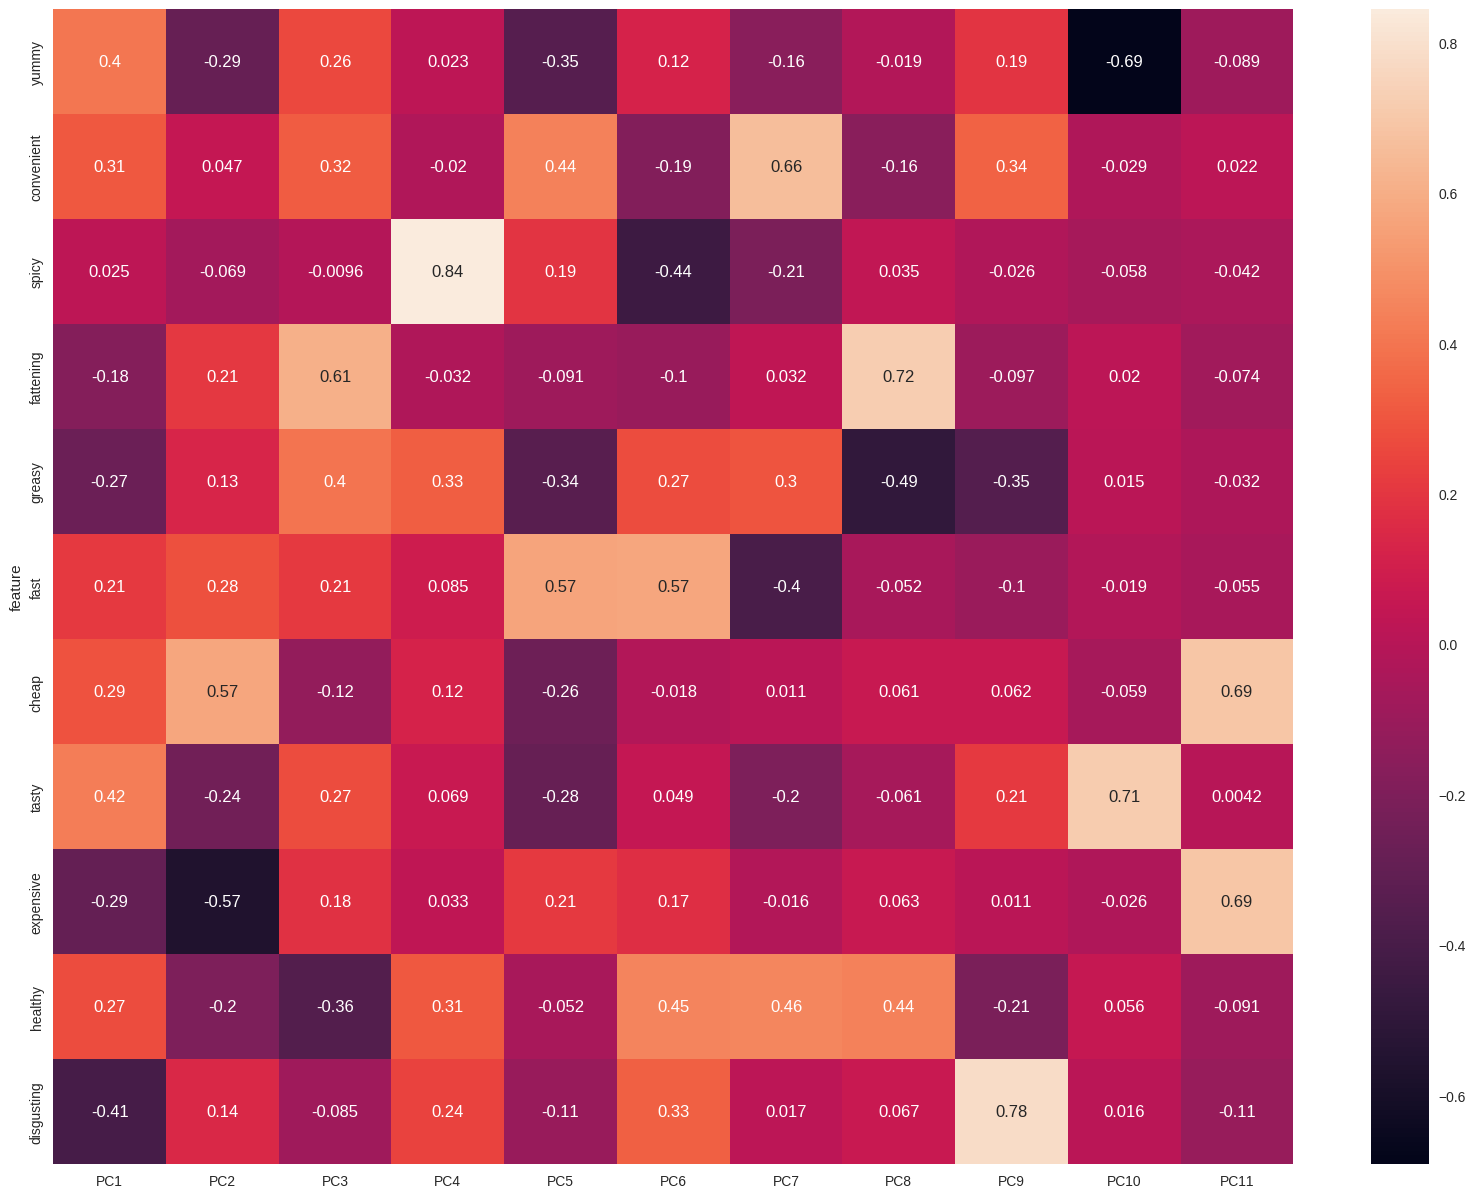

In [22]:
# correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='rocket')
plt.show()

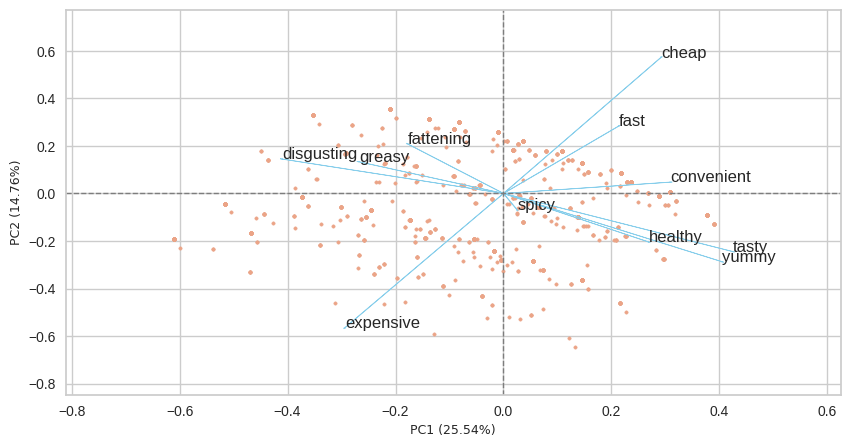

In [23]:
# get PC scores
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

# **Clustering Analysis for Market Segmentation**

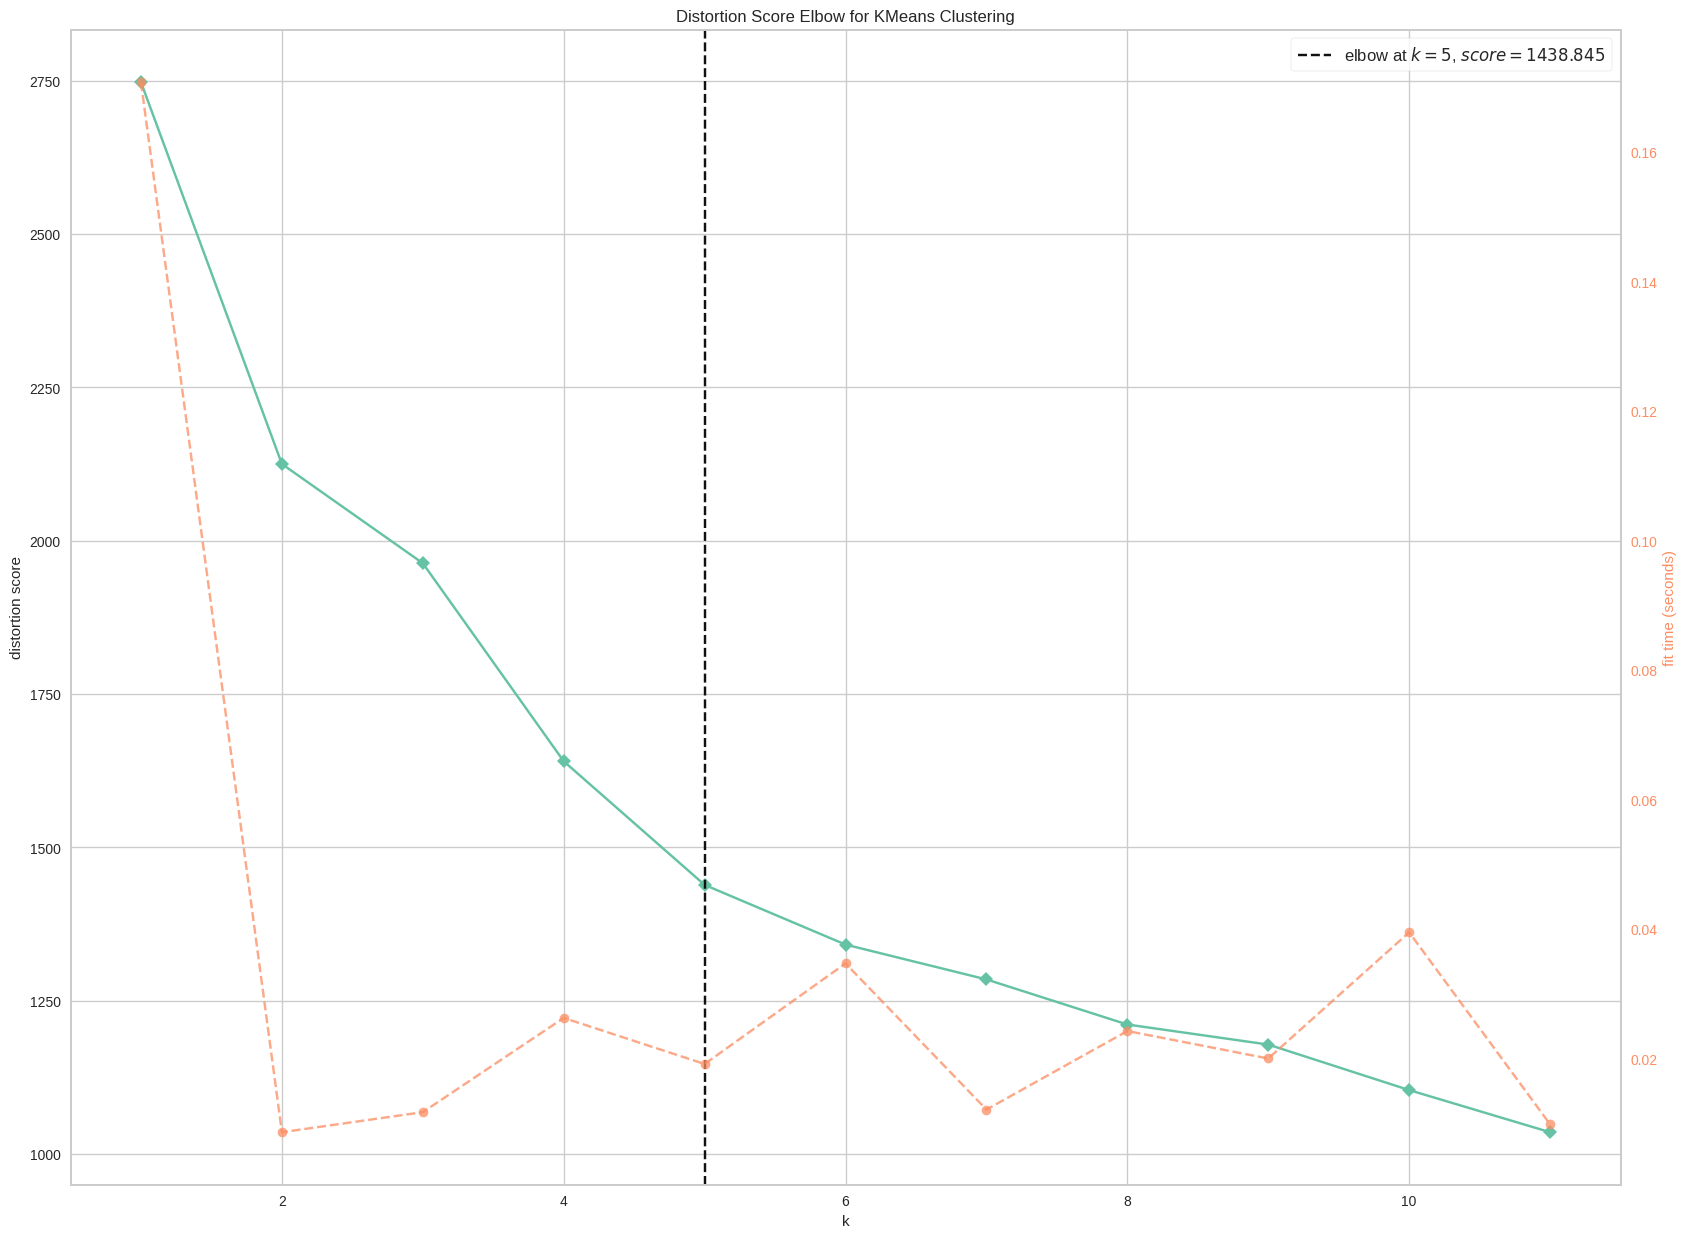

In [24]:
# using k-means clustering analysis for extracting segments
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

# **Applying the K-Means Clustering Algorithm**

In [25]:
# k-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
data['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS)
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [0 1 1 ... 1 3 2]
WCSS: 1699.9995072731992
No. of iterations:  8
Cluster centroids:  [[0.08421053 0.85789474 0.07894737 0.74210526 0.27894737 0.80526316
  0.10526316 0.22631579 0.60526316 0.14736842 0.14736842]
 [0.89491525 0.95932203 0.13898305 0.92542373 0.6779661  0.87457627
  0.11864407 0.95254237 0.93220339 0.21355932 0.16271186]
 [0.00837989 0.77094972 0.07541899 0.97486034 0.7849162  0.8603352
  0.67039106 0.06145251 0.32402235 0.04189944 0.69553073]
 [0.85544218 0.97959184 0.09013605 0.81122449 0.37414966 0.96428571
  0.94727891 0.9744898  0.0170068  0.30782313 0.04251701]]
Cluster size:  Counter({3: 588, 2: 358, 1: 295, 0: 190})


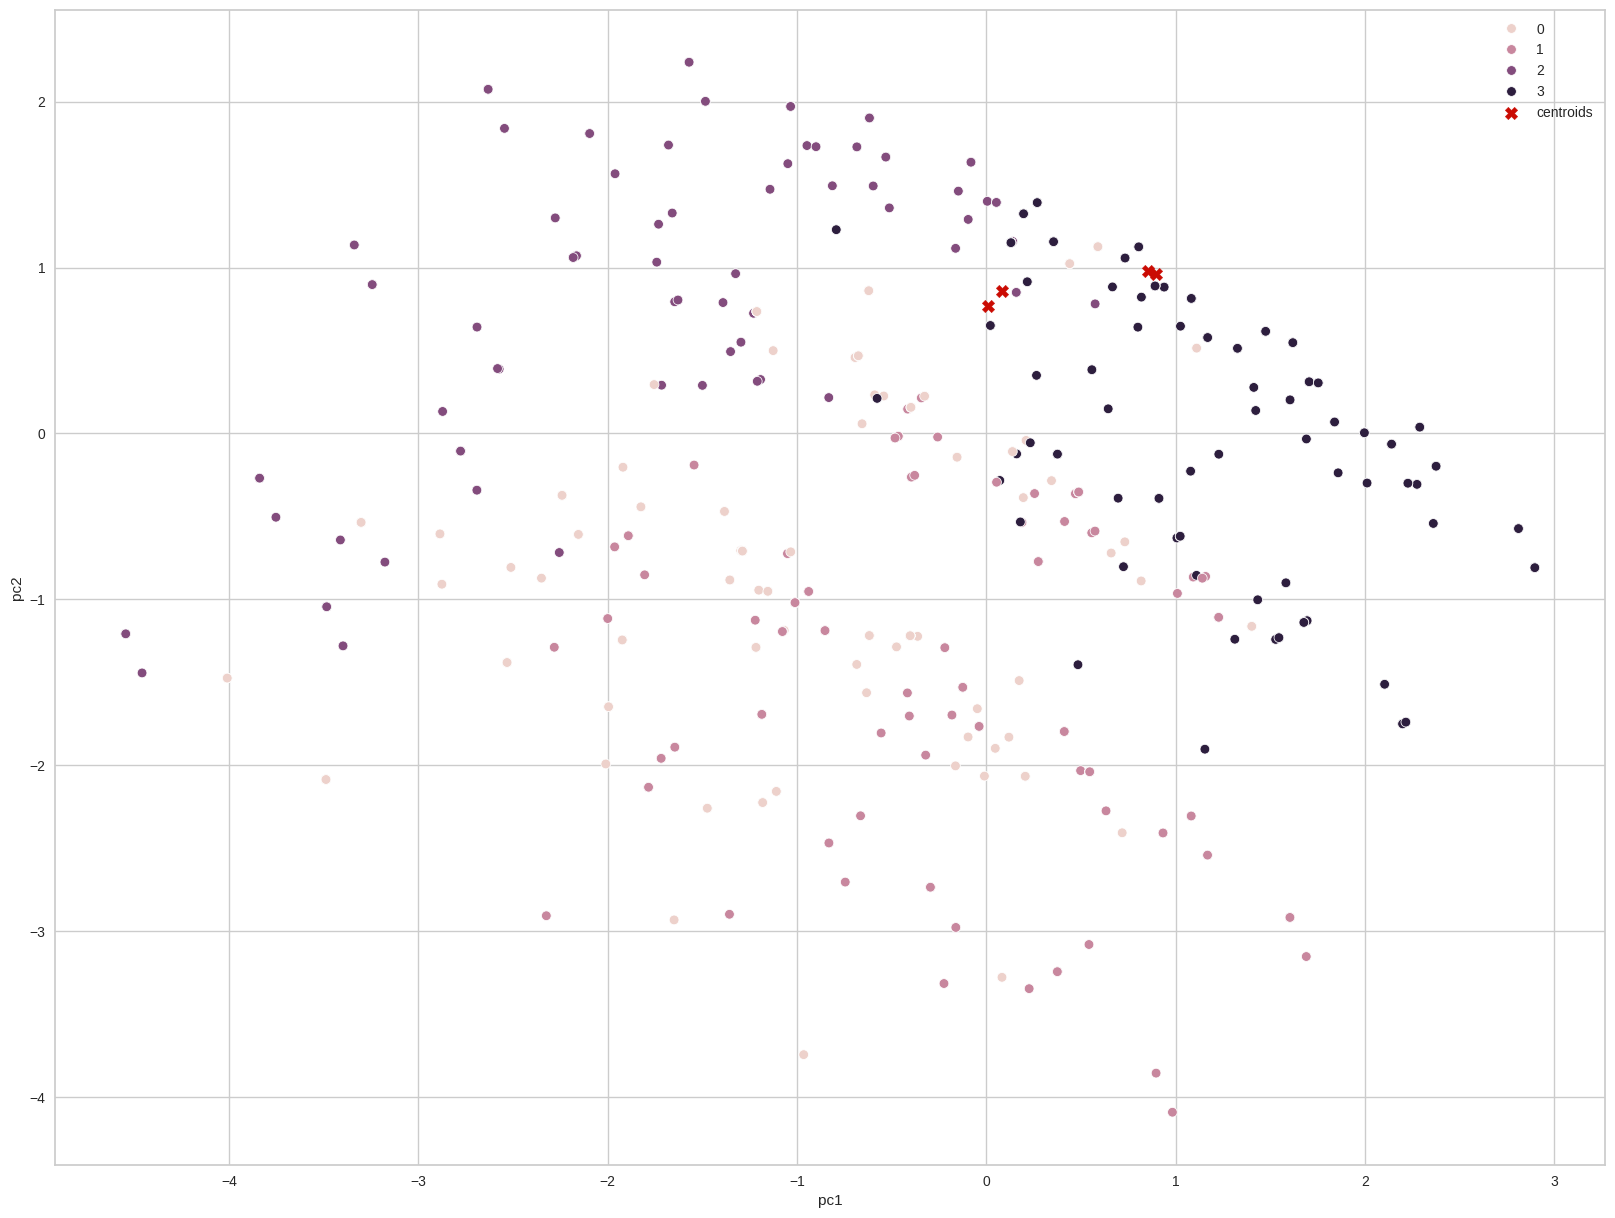

In [26]:

# cluster visualization
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

# **Describing Segments**

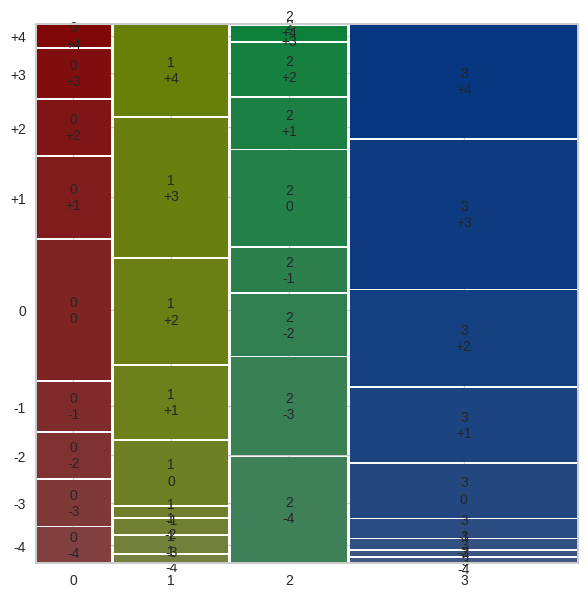

Like,-4,-3,-2,-1,0,+1,+2,+3,+4
cluster_num,,,,,,,,,
0,11,14,14,15,43,25,17,15,7
1,4,8,7,5,30,34,49,65,43
2,50,46,29,21,45,24,25,7,0
3,5,5,9,17,50,69,89,138,106


None

In [27]:
# crosstab creation
crosstab = pd.crosstab(data['cluster_num'], data['Like'])
crosstab = crosstab[['-4','-3','-2','-1','0','+1','+2','+3','+4']]
crosstab

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

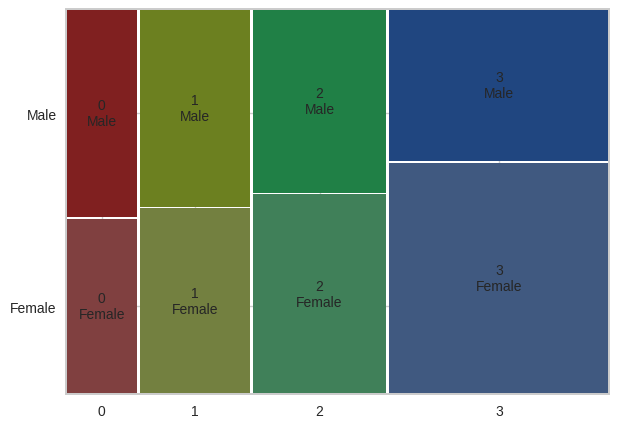

Like,-4,-3,-2,-1,0,+1,+2,+3,+4
cluster_num,,,,,,,,,
0,11,14,14,15,43,25,17,15,7
1,4,8,7,5,30,34,49,65,43
2,50,46,29,21,45,24,25,7,0
3,5,5,9,17,50,69,89,138,106


None

In [28]:
# crosstab creation
crosstab_gender = pd.crosstab(data['cluster_num'],data['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

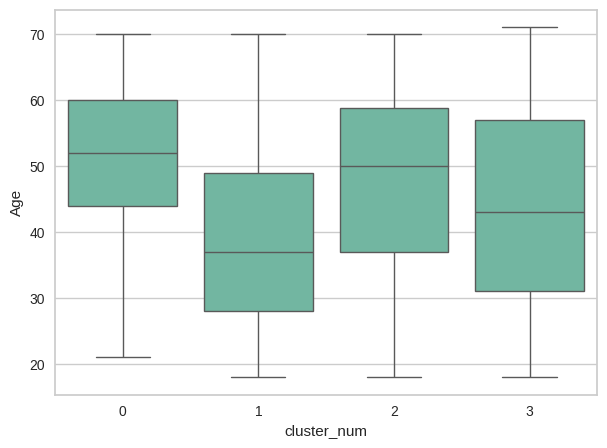

In [29]:

#box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=data);

# **Selecting the Target Segment**

In [30]:
# calculating the mean of 'VisitFrequency'
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.605263
1,1,2.586441
2,2,2.729050
3,3,2.624150


In [31]:
# calculating the mean of 'Like'
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like


,cluster_num,Like
0,0,5.084211
1,1,3.969492
2,2,6.293296
3,3,3.838435


In [32]:
# calculating the mean of 'Gender'
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.542105
1,1,0.515254
2,2,0.477654
3,3,0.396259


In [33]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.542105,5.084211,2.605263
1,1,0.515254,3.969492,2.586441
2,2,0.477654,6.293296,2.729050
3,3,0.396259,3.838435,2.624150


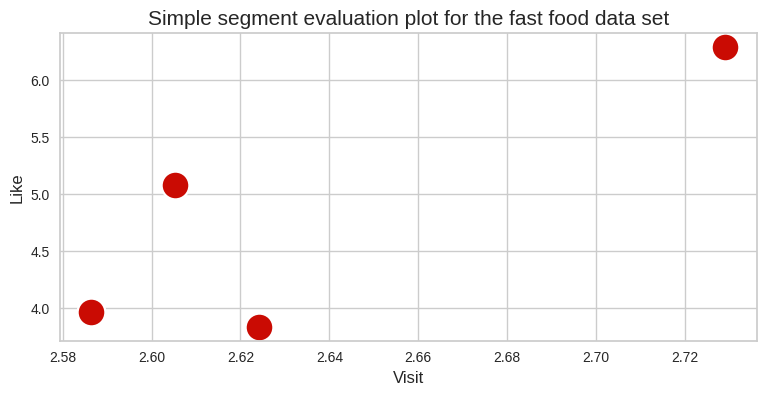

In [34]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()